In [471]:
import numpy as np
import matplotlib.pyplot as plt

In [556]:
# Generate random data points
np.random.seed(42)
X = np.sort(np.random.rand(100) * 10)  # 100 points between 0 and 10
y = np.sin(X) + np.random.normal(0, 0.3, X.shape)  # Sine wave with noise

X = np.array([X]).T
y = np.array([y]).T

X_intercept_terms = np.array([np.ones(len(X))]).T
X_augmented = np.hstack((X_intercept_terms, X))

In [541]:
def weight(X, X_query_point, bandwidth):
    return np.exp(-(X - X_query_point)**2) / (2 * bandwidth**2)

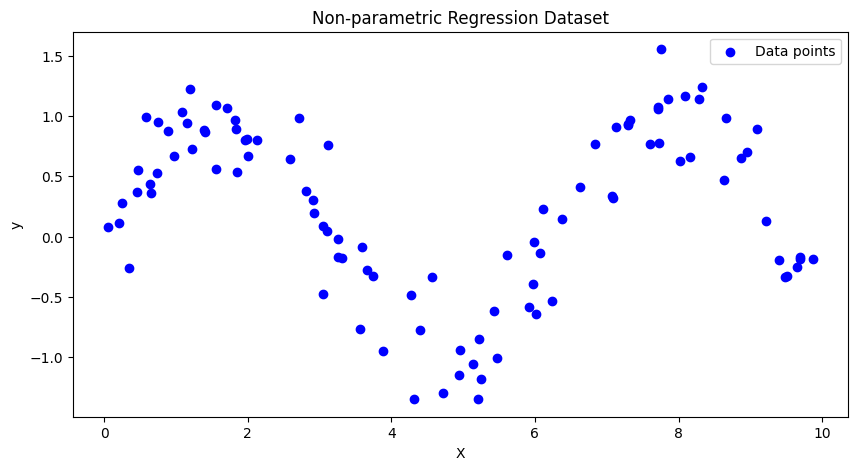

In [651]:
# Plot the dataset
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='b', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-parametric Regression Dataset')
plt.legend()

In [655]:
global_pred = []
for i in range(len(X)):
    weight_value = []
    for j in range(len(X)):
        weight_value.append(weight(X[i], X[j], 10)[0])
  
    weight_dia = np.diag(weight_value)
    
    theta = np.linalg.pinv(X_augmented.T @ weight_dia @ X_augmented) @ X_augmented.T @ weight_dia @ y
    local_pred = X_augmented[i] @ theta
    global_pred.append(local_pred)

print(global_pred)


[array([0.10933675]), array([0.23334935]), array([0.27086466]), array([0.33729424]), array([0.41181114]), array([0.4198116]), array([0.49164306]), array([0.52273]), array([0.53090196]), array([0.57729722]), array([0.57976257]), array([0.64148739]), array([0.67544051]), array([0.70676158]), array([0.72630717]), array([0.73392007]), array([0.73838206]), array([0.75768937]), array([0.75827992]), array([0.75535119]), array([0.75533325]), array([0.73719822]), array([0.71354631]), array([0.70963256]), array([0.70591575]), array([0.67365659]), array([0.66478867]), array([0.66159689]), array([0.61563015]), array([0.39678583]), array([0.32524128]), array([0.26714307]), array([0.20136165]), array([0.19534696]), array([0.11355639]), array([0.11098213]), array([0.06637508]), array([0.06121871]), array([-0.03531375]), array([-0.03637385]), array([-0.0764969]), array([-0.25679102]), array([-0.26810982]), array([-0.31898917]), array([-0.36927941]), array([-0.45017807]), array([-0.63263054]), array([-

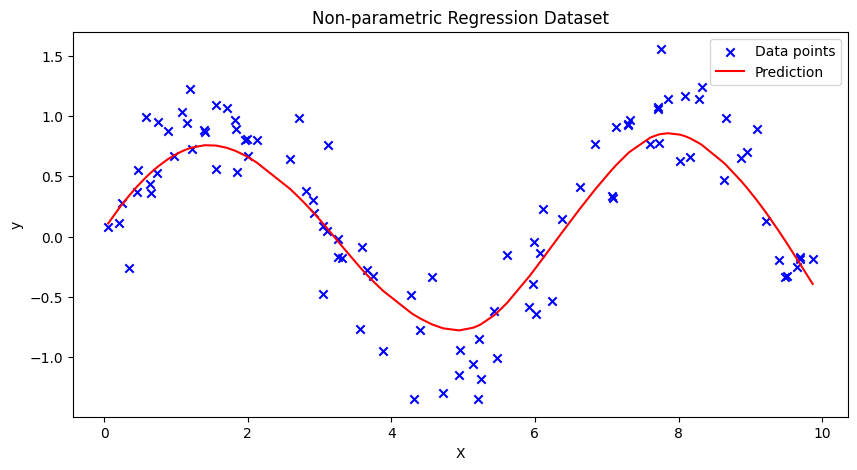

In [656]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='b', label='Data points', marker="x" )
plt.plot(X, global_pred, color='r', label='Prediction')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-parametric Regression Dataset')
plt.legend()